In [1]:
'''
Description:

This project utilizes a dataset of housing prices in Portland, Oregon to predict good market prices.  The project uses a regression model.
It features data engineering to quantify certain values, and drop columns that likely are not needed for the prediciton.  The Gradient Descent Algorithm is used to predict house prices.  
At the end, a convergence graph is included, along with a prediction of a house given a set of column values.

The first column is the square footage of the house, the second is the number of bedrooms, and the third is the price.

The dataset was taken from the UCI Machine Learning Repository.
'''

In [79]:
## Load Housing_data.txt
import pandas as pd

def load_data():
    return pd.read_csv('Housing_data.txt', header=None)

In [81]:
# Print out some data points
housing = load_data()
housing.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [83]:
# Scale features and set them to zero mean
features = housing.iloc[:, :-1]
features = (features - features.mean()) / features.std()
features_df = pd.DataFrame(features, columns=features.columns)
features_df[2] = housing.iloc[:, -1].values

In [85]:
# Print out some data points
features_df.head()

,0,1,2
0,0.130010,-0.223675,399900
1,-0.504190,-0.223675,329900
2,0.502476,-0.223675,369000
3,-0.735723,-1.537767,232000
4,1.257476,1.090417,539900


In [87]:
import numpy as np

# Some gradient descent settings
iterations = 1500;
alpha = 0.01;
m = len(y)
ones = np.ones(m)
x = features_df[[0,1]]
x[2] = ones
y = features_df[2]
J_history = np.zeros(iterations)

def compute_cost(x, y, theta):
    predictions = x.dot(theta)
    errors = predictions - y
    j = (1 / (2 * m)) * np.sum(errors ** 2)
    return j

# Init Theta and Run Gradient Descent 
theta = np.zeros(x.shape[1])
for iter in range(iterations):
    predictions = x.dot(theta)
    errors = predictions - y 
    theta -= (alpha / m) * (x.T.dot(errors))
    
    #   You should set J_history(iter) to the cost of using the current values of theta. 
    J_history[iter] = compute_cost(x, y, theta)

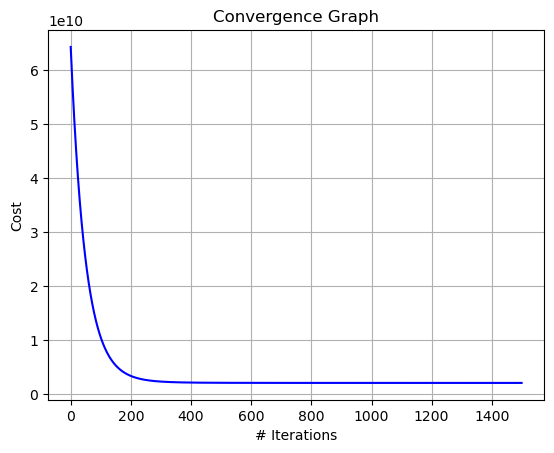

In [88]:
# Plot the convergence graph
import matplotlib.pyplot as plt

plt.plot(range(iterations), J_history, color='blue')
plt.title('Convergence Graph')
plt.xlabel('# Iterations')
plt.ylabel('Cost')
plt.grid()
plt.show()

In [89]:
#Display Gradient Descent's Result
theta

0    110540.566546
1     -6558.990548
2    340412.563014
dtype: float64

In [107]:
#Predicting the price of given house, using same scaling as prior
new_house = np.array([1650, 3])
new_house = (new_house - new_house.mean()) / new_house.std()
new_house = np.append(new_house, 1)
new_house
predicted_price = new_house.dot(theta)

predicted_price

457512.1201087792